In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_train.head(), data_test.head()

(   id Product ID Type  Air temperature [K]  Process temperature [K]  \
 0   0     L50096    L                300.6                    309.6   
 1   1     M20343    M                302.6                    312.1   
 2   2     L49454    L                299.3                    308.5   
 3   3     L53355    L                301.0                    310.9   
 4   4     M24050    M                298.0                    309.0   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0                    1596         36.1              140                0    0   
 1                    1759         29.1              200                0    0   
 2                    1805         26.5               25                0    0   
 3                    1524         44.3              197                0    0   
 4                    1641         35.4               34                0    0   
 
    HDF  PWF  OSF  RNF  
 0    0    0    0    0  
 1    0    0    0    0

In [3]:
data_train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data_train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

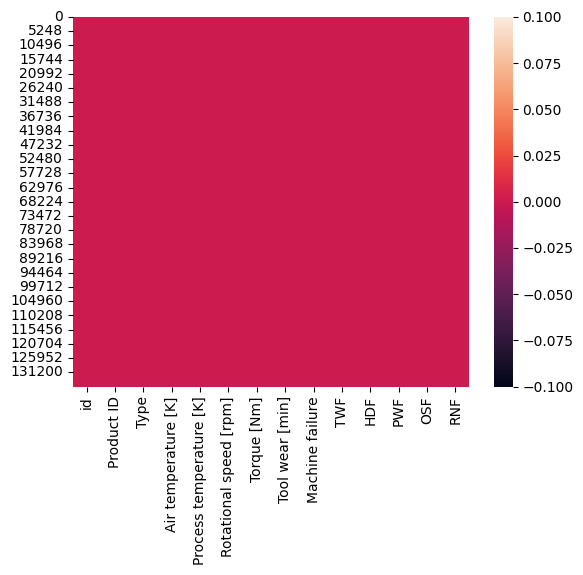

In [5]:
sns.heatmap(data_train.isnull())

In [6]:
list(zip(data_train.columns,data_train.dtypes,data_train.nunique()))

[('id', dtype('int64'), 136429),
 ('Product ID', dtype('O'), 9976),
 ('Type', dtype('O'), 3),
 ('Air temperature [K]', dtype('float64'), 95),
 ('Process temperature [K]', dtype('float64'), 81),
 ('Rotational speed [rpm]', dtype('int64'), 952),
 ('Torque [Nm]', dtype('float64'), 611),
 ('Tool wear [min]', dtype('int64'), 246),
 ('Machine failure', dtype('int64'), 2),
 ('TWF', dtype('int64'), 2),
 ('HDF', dtype('int64'), 2),
 ('PWF', dtype('int64'), 2),
 ('OSF', dtype('int64'), 2),
 ('RNF', dtype('int64'), 2)]

In [7]:
list(zip(data_test.columns,data_train.dtypes,data_train.nunique()))

[('id', dtype('int64'), 136429),
 ('Product ID', dtype('O'), 9976),
 ('Type', dtype('O'), 3),
 ('Air temperature [K]', dtype('float64'), 95),
 ('Process temperature [K]', dtype('float64'), 81),
 ('Rotational speed [rpm]', dtype('int64'), 952),
 ('Torque [Nm]', dtype('float64'), 611),
 ('Tool wear [min]', dtype('int64'), 246),
 ('TWF', dtype('int64'), 2),
 ('HDF', dtype('int64'), 2),
 ('PWF', dtype('int64'), 2),
 ('OSF', dtype('int64'), 2),
 ('RNF', dtype('int64'), 2)]

<Axes: xlabel='Type', ylabel='count'>

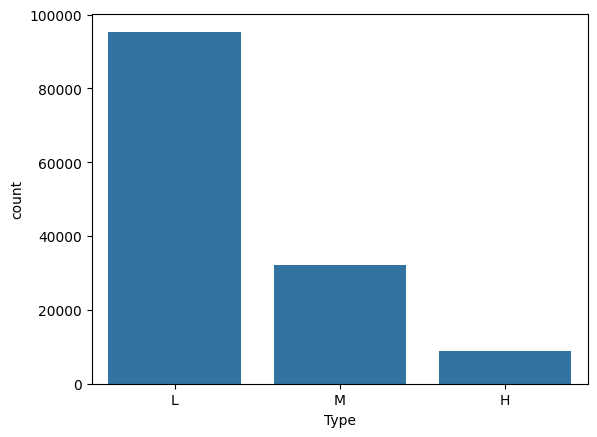

In [8]:
sns.countplot(x="Type", data=data_train)

In [9]:
#hatalı/hatasız durumların toplam sayısı
data_train['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

Preprocessing

In [10]:
typesTrain=pd.get_dummies(data_train['Type'], drop_first=False)
typesTest=pd.get_dummies(data_train['Type'], drop_first=False)

typesTrain.head(),typesTest.head()

(       H      L      M
 0  False   True  False
 1  False  False   True
 2  False   True  False
 3  False   True  False
 4  False  False   True,
        H      L      M
 0  False   True  False
 1  False  False   True
 2  False   True  False
 3  False   True  False
 4  False  False   True)

In [11]:
mapping_boolean = {True: 1, False: 0}
typesTrain['H'] = typesTrain['H'].map(mapping_boolean)
typesTrain['L'] = typesTrain['L'].map(mapping_boolean)
typesTrain['M'] = typesTrain['M'].map(mapping_boolean)

mapping_boolean = {True: 1, False: 0}
typesTest['H'] = typesTest['H'].map(mapping_boolean)
typesTest['L'] = typesTest['L'].map(mapping_boolean)
typesTest['M'] = typesTest['M'].map(mapping_boolean)
typesTrain.head(),typesTest.head()

(   H  L  M
 0  0  1  0
 1  0  0  1
 2  0  1  0
 3  0  1  0
 4  0  0  1,
    H  L  M
 0  0  1  0
 1  0  0  1
 2  0  1  0
 3  0  1  0
 4  0  0  1)

In [12]:
data_train=pd.concat([data_train, typesTrain], axis=1)
data_test=pd.concat([data_test, typesTest], axis=1)

id=data_test['id']

data_train.head(), data_test.head()

(   id Product ID Type  Air temperature [K]  Process temperature [K]  \
 0   0     L50096    L                300.6                    309.6   
 1   1     M20343    M                302.6                    312.1   
 2   2     L49454    L                299.3                    308.5   
 3   3     L53355    L                301.0                    310.9   
 4   4     M24050    M                298.0                    309.0   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0                    1596         36.1              140                0    0   
 1                    1759         29.1              200                0    0   
 2                    1805         26.5               25                0    0   
 3                    1524         44.3              197                0    0   
 4                    1641         35.4               34                0    0   
 
    HDF  PWF  OSF  RNF  H  L  M  
 0    0    0    0    0  0  1  0  
 1  

In [13]:
data_train.drop(["id","Product ID","Type"], axis=1, inplace=True)
data_test.drop(["id","Product ID","Type"], axis=1, inplace=True)

data_train.head(), data_test.head()

(   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
 0                300.6                    309.6                    1596   
 1                302.6                    312.1                    1759   
 2                299.3                    308.5                    1805   
 3                301.0                    310.9                    1524   
 4                298.0                    309.0                    1641   
 
    Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  H  \
 0         36.1              140                0    0    0    0    0    0  0   
 1         29.1              200                0    0    0    0    0    0  0   
 2         26.5               25                0    0    0    0    0    0  0   
 3         44.3              197                0    0    0    0    0    0  0   
 4         35.4               34                0    0    0    0    0    0  0   
 
    L  M  
 0  1  0  
 1  0  1  
 2  1  0  
 3  1  0  

In [14]:
y=data_train['Machine failure']
data_train.drop(['Machine failure'], axis=1, inplace=True)

Burada yapılacak işlem cross_val_score ulaşabilmek için yapıyoruz yoksa
feature_names must be string, and may not contain [, ] or <
hatası alıyoruz

In [15]:
original_columns = [                                                    #orjinal stun adlarını belirlemek için kullanılmış
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

new_columns = {col: col.split(' [')[0] for col in original_columns}     #yeni stun oluşturup stün adlarını daha anlamlı hale getirmek için kullanılır
data_train = data_train.rename(columns=new_columns)                     #data_train stün adlarıonı yeni stun isimleriyle değiştirir

data_test = data_test.rename(columns=new_columns)                       #aynı işlemi data_test içinde yapar
print(data_test.columns)                                               #yapılan işlemlerin kontrolü sağlanır

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'],
      dtype='object')


**XGMClassifier**

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', max_depth=3, learning_rate=0.1)
xgb_model.fit(data_train, y)

TrainAccuracy=xgb_model.score(data_train, y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9962


**RandomForestClassifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(data_train, y)

TrainAccuracy=rf_model.score(data_train, y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9998


**k-Nearest Neighbors (KNN)**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(data_train,y)

TrainAccuracy=knn_model.score(data_train,y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9884


**LogisticRegression**

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(data_train,y)

TrainAccuracy=lr_model.score(data_train,y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9954


c:\Users\Basri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**DecisionTreeClassifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=4, random_state=42)
dt_model.fit(data_train,y)

TrainAccuracy=dt_model.score(data_train,y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9948


**SVC**

In [21]:
from sklearn.svm import SVC

svc_model=SVC(random_state=42)
svc_model.fit(data_train,y)

TrainAccuracy=svc_model.score(data_train,y)
print(f"Accuracy:{TrainAccuracy:.4f}")

Accuracy:0.9843


In [22]:
predicts=rf_model.predict(data_test)
df_submit=pd.DataFrame({'id':id,'Machine failure':predicts})
df_submit.to_csv('sub.csv', index=False)